# Sentiment Analysis - using twitter data

The scope here is to extract sentiments of viewers after a particular show. (Game of Thrones Season 6 is used here)

Modules in this notebook include:
 - Text preprocessing
 - Extraction of words that contain sentiment
 - Scoring the sentiment based on polarity
 - Visual reperesntation using various techniques

# Step 1 : Text Preprocessing

Import necessary packages

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import string
import os

import nltk
nltk.download('stopwords')

In [3]:
raw_df

,contributors,truncated,text,is_quote_status,in_reply_to_status_id,id,favorite_count,entities,retweeted,coordinates,...,in_reply_to_user_id_str,possibly_sensitive,lang,created_at,in_reply_to_status_id_str,place,metadata,quoted_status_id,quoted_status,quoted_status_id_str
0,NaN,False,RT @GoT_Tyrion: The fandom when Drogon lands.....,False,NaN,737516959487561728,0,"{'symbols': [], 'user_mentions': [{'id': 96355...",False,None,...,NaN,0.0,en,2016-05-31 05:32:00+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
1,NaN,False,RT @mpmorales: ''Male actors suffering same se...,False,NaN,737516957751083012,0,"{'symbols': [], 'user_mentions': [{'id': 45995...",False,None,...,NaN,0.0,en,2016-05-31 05:31:59+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
2,NaN,False,RT @LordSnow: Sam problems. #GameOfThrones htt...,False,NaN,737516956211781633,0,"{'symbols': [], 'user_mentions': [{'id': 89604...",False,None,...,NaN,0.0,en,2016-05-31 05:31:59+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
3,NaN,False,RT @_Khaleesi: Benjen Stark Last episode of #G...,False,NaN,737516952046837765,0,"{'symbols': [], 'user_mentions': [{'id': 51047...",False,None,...,NaN,0.0,en,2016-05-31 05:31:58+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
4,NaN,False,RT @VanityFair: #GameOfThrones: A painstaking ...,False,NaN,737516914272919553,0,"{'symbols': [], 'user_mentions': [{'id': 15279...",False,None,...,NaN,0.0,en,2016-05-31 05:31:49+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,NaN,False,RT @Renly_B: Mace Tyrell is that person on an ...,False,NaN,737424104777621504,0,"{'symbols': [], 'user_mentions': [{'id': 15461...",False,None,...,NaN,NaN,en,2016-05-30 23:23:01+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
10002,NaN,False,Sam went full thuglife on his daddy #GameofThr...,False,NaN,737424094065483781,0,"{'symbols': [], 'user_mentions': [], 'hashtags...",False,None,...,NaN,NaN,en,2016-05-30 23:22:59+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
10003,NaN,False,RT @CasterlyLion: jaime fucking lannister on h...,False,NaN,737424083474731009,0,"{'symbols': [], 'user_mentions': [{'id': 22632...",False,None,...,NaN,0.0,en,2016-05-30 23:22:56+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN,NaN
10004,NaN,False,my #GameofThrones recap https://t.co/AbIwIPsi8S,True,NaN,737424082061406209,1,"{'symbols': [], 'user_mentions': [], 'hashtags...",False,None,...,NaN,0.0,en,2016-05-30 23:22:56+00:00,NaN,None,"{'iso_language_code': 'en', 'result_type': 're...",7.374218e+17,"{'contributors': None, 'truncated': False, 'te...",7.374218e+17


In [5]:
cols= list(df.columns.values)
cols

['contributors',
 'truncated',
 'text',
 'is_quote_status',
 'in_reply_to_status_id',
 'id',
 'favorite_count',
 'entities',
 'retweeted',
 'coordinates',
 'source',
 'in_reply_to_screen_name',
 'in_reply_to_user_id',
 'retweet_count',
 'id_str',
 'favorited',
 'retweeted_status',
 'user',
 'geo',
 'in_reply_to_user_id_str',
 'possibly_sensitive',
 'lang',
 'created_at',
 'in_reply_to_status_id_str',
 'place',
 'metadata',
 'quoted_status_id',
 'quoted_status',
 'quoted_status_id_str']

In [6]:
df1=df[[cols[2]]]
df1

,text
0,RT @GoT_Tyrion: The fandom when Drogon lands.....
1,RT @mpmorales: ''Male actors suffering same se...
2,RT @LordSnow: Sam problems. #GameOfThrones htt...
3,RT @_Khaleesi: Benjen Stark Last episode of #G...
4,RT @VanityFair: #GameOfThrones: A painstaking ...
...,...
10001,RT @Renly_B: Mace Tyrell is that person on an ...
10002,Sam went full thuglife on his daddy #GameofThr...
10003,RT @CasterlyLion: jaime fucking lannister on h...
10004,my #GameofThrones recap https://t.co/AbIwIPsi8S


Cleaning the tweets for hashtags, unrecognized and special characters using pattern matching and regex functions

In [9]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text) #remove numbers
    text = "".join(c for c in text if ord(c)<128) #remove unrecognized characters
    text = re.sub(r'\n','',text)
    return text

def textclean(text):    
    text = re.sub(r'@[A-Za-z0-9_]+','',text)
    text = re.sub(r'#[A-Za-z0-9_]+','',text)
    text = re.sub(r'RT[\s]+','',text) #remove retweets
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+",'',text)
    return text


In [10]:
df1['text']= df1['text'].apply(lambda x: textclean(x))
df1['text']= df1['text'].apply(lambda x: remove_punct(x))
df1.head(10)

<ipython-input-10-afb8e27cc10d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text']= df1['text'].apply(lambda x: textclean(x))
<ipython-input-10-afb8e27cc10d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text']= df1['text'].apply(lambda x: remove_punct(x))


,text
0,The fandom when Drogon lands
1,Male actors suffering same sexism as female s...
2,Sam problems
3,Benjen Stark Last episode of
4,A painstaking breakdown of everything Bran l...
5,Even though Hodor may be gone isnt getting a...
6,How To Train your Dragon
7,When Daenerys walks out of the flaming hut I d...
8,THE UNSULLIED Dictionary Art by littlevintage...
9,It was just a matter of time


# Convert strings into tokens to facilitate stop words removal and sentiment extraction

In [20]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df2['text']= df2['text'].apply(lambda x: tokenization(x.lower()))
df2

,text
0,"[, the, fandom, when, drogon, lands, ]"
1,"[, male, actors, suffering, same, sexism, as, ..."
2,"[, sam, problems, ]"
3,"[, benjen, stark, last, episode, of, ]"
4,"[, a, painstaking, breakdown, of, everything, ..."
...,...
4482,"[thoughts, on, last, nights, yay, uncle, benje..."
4483,"[, mace, tyrell, is, that, person, on, an, mmo..."
4484,"[sam, went, full, thuglife, on, his, daddy, ]"
4485,"[, jaime, fucking, lannister, on, his, white, ..."


Adding stop words specific to the show that conveys no particular sentiment

In [58]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['tarly','stark','starks','https','http','yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week','treatment', 'associated', 'patients', 'may','day', 'case','old','game','thrones','episode','thats','disc set','im','ep','amp','got','youre','ive','via'])

In [59]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

In [60]:
df2['text'] = df2['text'].apply(lambda x: remove_stopwords(x))
df2

,text,senti_score,poll
0,"[, fandom, drogon, lands, ]","(0.0, 0.0)",neutral
1,"[, male, actors, suffering, sexism, female, st...","(0.0, 0.13333333333333333)",neutral
2,"[, sam, problems, ]","(0.0, 0.0)",neutral
3,"[, benjen, last, ]","(0.0, 0.06666666666666667)",neutral
4,"[, painstaking, breakdown, everything, bran, l...","(0.0, 0.0)",neutral
...,...,...,...
4482,"[thoughts, last, nights, yay, uncle, benjen, d...","(0.0, 0.06666666666666667)",neutral
4483,"[, mace, tyrell, person, mmorpg, paid, get, fa...","(0.0, 0.0)",neutral
4484,"[sam, went, full, thuglife, daddy, ]","(0.35, 0.55)",positive
4485,"[, jaime, fucking, lannister, white, horse, ]","(-0.3, 0.4)",negative


In [62]:
def sentiment_extract(x):
    x = " ".join(x)
    return TextBlob(x).sentiment

In [63]:
df2['senti_score'] = df2['text'].apply(sentiment_extract)
df2

,text,senti_score,poll
0,"[, fandom, drogon, lands, ]","(0.0, 0.0)",neutral
1,"[, male, actors, suffering, sexism, female, st...","(0.0, 0.13333333333333333)",neutral
2,"[, sam, problems, ]","(0.0, 0.0)",neutral
3,"[, benjen, last, ]","(0.0, 0.06666666666666667)",neutral
4,"[, painstaking, breakdown, everything, bran, l...","(0.0, 0.0)",neutral
...,...,...,...
4482,"[thoughts, last, nights, yay, uncle, benjen, d...","(0.0, 0.06666666666666667)",neutral
4483,"[, mace, tyrell, person, mmorpg, paid, get, fa...","(0.0, 0.0)",neutral
4484,"[sam, went, full, thuglife, daddy, ]","(0.35, 0.55)",positive
4485,"[, jaime, fucking, lannister, white, horse, ]","(-0.3, 0.4)",negative


In [64]:
def poll(t):
        if t[0]>0:
            return 'positive'
        elif t[0]<0:
            return 'negative'
        elif t[0]==0:
            return 'neutral'

In [65]:
df2['poll'] = df2['senti_score'].apply(poll)

In [66]:
df2

,text,senti_score,poll
0,"[, fandom, drogon, lands, ]","(0.0, 0.0)",neutral
1,"[, male, actors, suffering, sexism, female, st...","(0.0, 0.13333333333333333)",neutral
2,"[, sam, problems, ]","(0.0, 0.0)",neutral
3,"[, benjen, last, ]","(0.0, 0.06666666666666667)",neutral
4,"[, painstaking, breakdown, everything, bran, l...","(0.0, 0.0)",neutral
...,...,...,...
4482,"[thoughts, last, nights, yay, uncle, benjen, d...","(0.0, 0.06666666666666667)",neutral
4483,"[, mace, tyrell, person, mmorpg, paid, get, fa...","(0.0, 0.0)",neutral
4484,"[sam, went, full, thuglife, daddy, ]","(0.35, 0.55)",positive
4485,"[, jaime, fucking, lannister, white, horse, ]","(-0.3, 0.4)",negative


# Creating a pie chart for overall analysis of user sentiment to the show

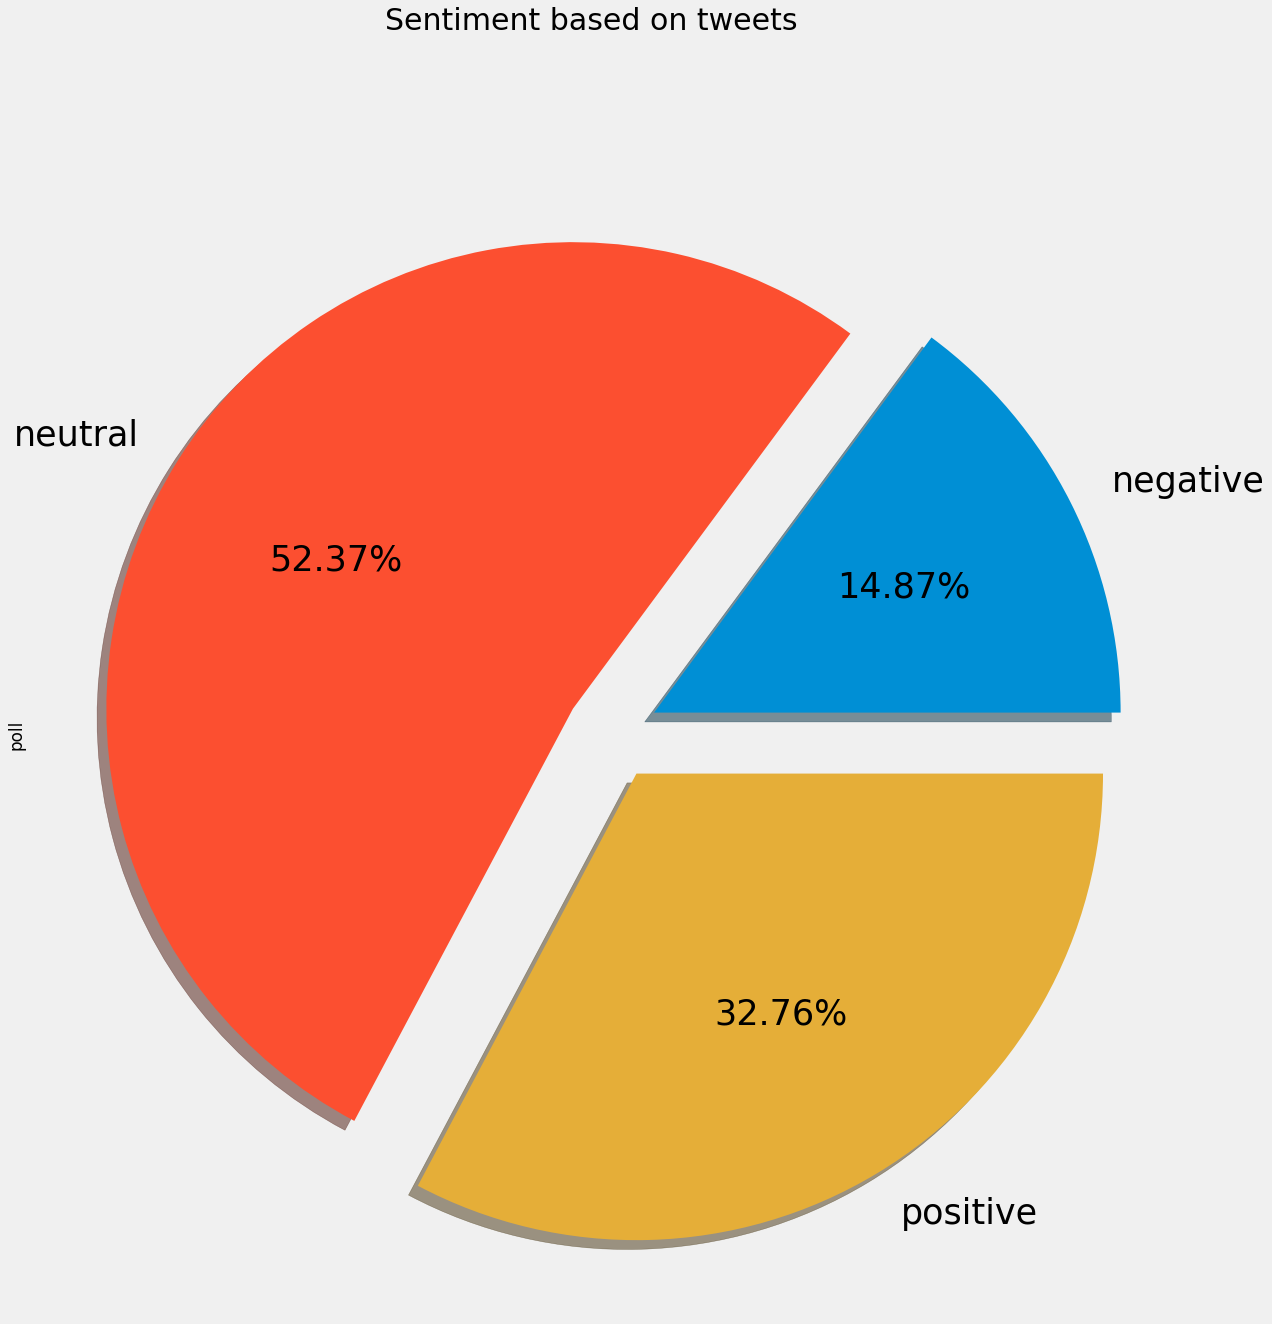

In [73]:
fig = plt.figure(figsize=(20, 20))
fig.suptitle('Sentiment based on tweets', fontsize=30)
df3.poll.value_counts(sort=False).plot.pie(textprops={'fontsize': 35},shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.show()

# Word cloud generation

Word clouds are popular in analysis of data. They help in areas like:
 - Conveying more information in a short glance
 - Can prioritize information so that they are given more importance

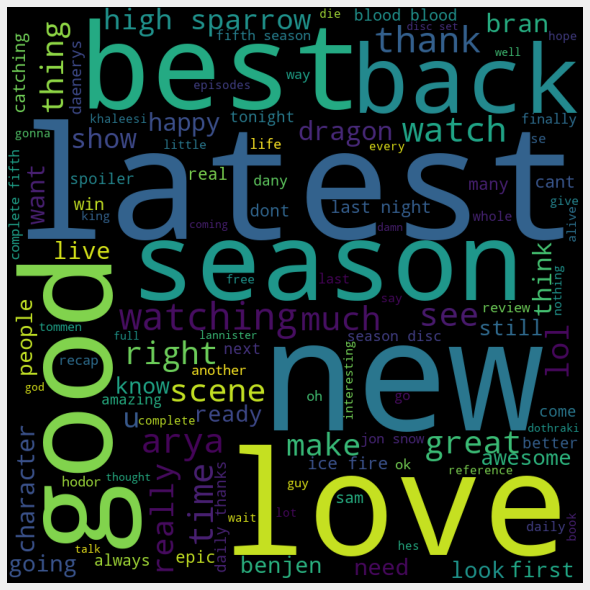

In [86]:
comment_words = ''
  
# iterate through the csv file
for val in positive_df.text:
      
    # typecaste each val to string
    val = " ".join(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 15).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

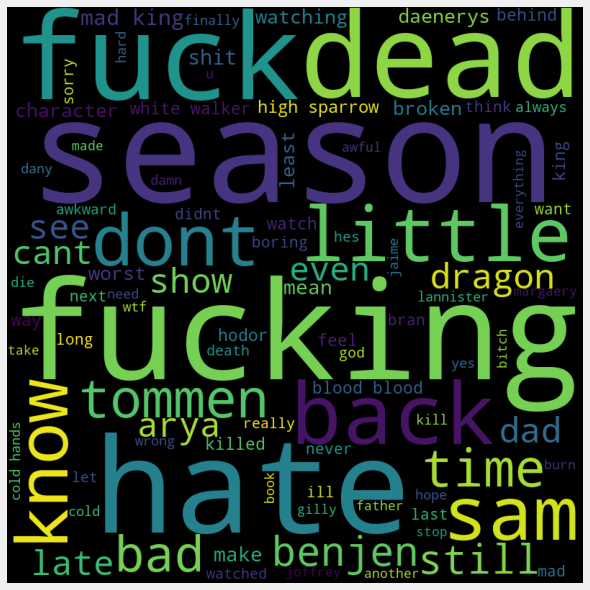

In [87]:
comment_words = ''
  
# iterate through the csv file
for val in negative_df.text:
      
    # typecaste each val to string
    val = " ".join(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 15).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

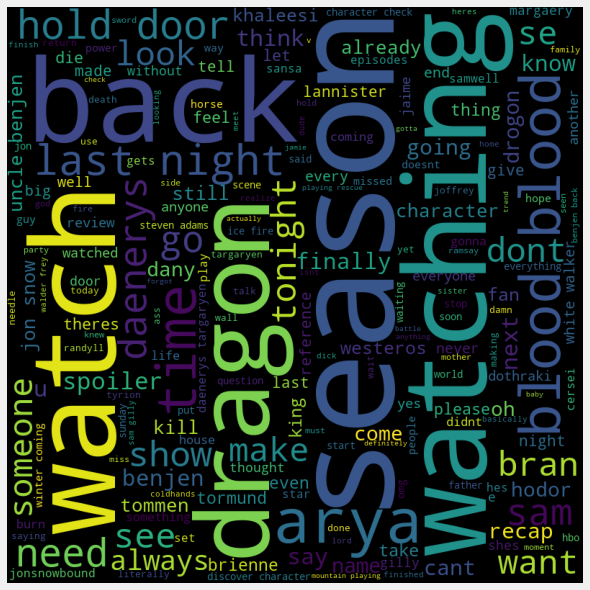

In [88]:
comment_words = ''
  
# iterate through the csv file
for val in neutral_df.text:
      
    # typecaste each val to string
    val = " ".join(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

From the above analysis we can see the parts where audience liked, hated or had no particular comments in the show. Using this analysis:
 - Art directors and script writers can have an understanding about what clicks with the audience
 - Promotions can be planned in accordance with these sub parts or characters to increase viewership and increase fanbase